In [6]:
import fastf1 as ff1
from fastf1 import plotting 

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import numpy as np

# tutorial para comparar o ritmo de corrida de cada piloto

In [7]:
# agora, faremos o caching do conteúdo de dados de fastf1

ff1.Cache.enable_cache('cache/')

# Livrando-se de eventuais erros
pd.options.mode.chained_assignment = None

In [10]:
# Agora, vamos ler os dados de corrida de uma corrida em específico
race = ff1.get_session(2022, 'Cingapure', 'R')

# Carregando as voltas

laps = race.load_laps()

C:\Users\e009349\Anaconda3\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Singapore Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '55', '4', '3', '18', '1', '5', '44', '10', '77', '20', '47', '63', '22', '31', '23', '14', '6', '24']


In [13]:
# convertendo tempo de corrida em voltas
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()

# para ter precisão, tiramos voltas em que eles estavam no pitstop
laps = laps.loc[(laps['PitOutTime'].isnull() & 
                 laps['PitInTime'].isnull())]

In [19]:
# usando o interquartil estatístico para filtrar mais o ritmo de corrida
q75, q25 = laps['LapTimeSeconds'].quantile(0.75), laps['LapTimeSeconds'].quantile(0.25)

intr_qr = q75 - q25

laptime_max = q75 + (1.5 * intr_qr) # regra de proximidade IQR: MAX
laptime_min = q25 - (1.5 * intr_qr) # regra de proximidade IQR: MIN

laps.loc[laps['LapTimeSeconds'] < laptime_min, 'LapTimeSeconds'] = np.nan
laps.loc[laps['LapTimeSeconds'] > laptime_max, 'LapTimeSeconds'] = np.nan

In [32]:
# plottando os dados para visualização
drivers_to_visualize = ['VER', 'LEC', 'SAI', 'VET']


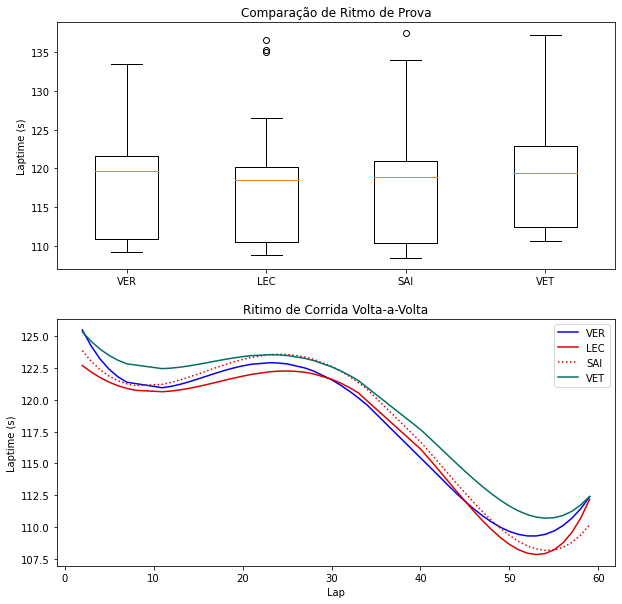

In [35]:
# para garantir que não teremos linhas etilizadas para teammates

visualized_teams = []

#Deixando o plot maior
plt.rcParams['figure.figsize'] = [10, 10]

# Criando dois subplots: um para o boxplot e um para a comparação volta-a-volta
fig, ax = plt.subplots(2)

#Boxplot para ritmo longo de prova

laptimes = [laps.pick_driver(x)['LapTimeSeconds'].dropna() for x in drivers_to_visualize]

ax[0].boxplot(laptimes, labels = drivers_to_visualize)
ax[0].set_title('Comparação de Ritmo de Prova')
ax[0].set(ylabel = 'Laptime (s)')

# Comparação Volta-a-Volta

for driver in drivers_to_visualize:
    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Selecionando todas as voltas do pilot
    driver_laps = driver_laps.dropna()
    
    team = pd.unique(driver_laps['Team'])[0]
    
    # Coordenada X é o número de volta
    x = driver_laps['LapNumber']
    
    # Coordenada Y é a linha tênua entre todos os tempos de voltas
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
    
    # Deixe claro que colegas de equipe não tenham linhas iguais
    
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plottando os dados
    
    ax[1].plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle)
    
    # Acrescentando camada
    ax[1].set(ylabel = 'Laptime (s)')
    ax[1].set(xlabel = 'Lap')
    
    # Inserindo Título
    ax[1].set_title('Ritimo de Corrida Volta-a-Volta')
    
    # Gerando legenda
    
    ax[1].legend()
    
    # Adicionado o time para a variável visualised items para que assim , a próxima linha fique diferente
    visualized_teams.append(team)
    
    plt.savefig('ritmo_corrida.png', dpi=300)

    
    
    
    
    
    

